In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
file_path = r"C:\Users\Admin\Desktop\DATA ANALYTICS INTERNSHIP\Task-11 test_group and control_group AB testing.xlsx"

In [1]:
import os
os.getcwd()

'/home/605543dc-c9e1-42b5-9e23-b94b46281a19'

In [2]:
'/home/farheen'

'/home/farheen'

In [6]:
'C:\\Users\\Admin'

'C:\\Users\\Admin'

In [5]:
file_path = r"C:\Users\Admin\Desktop\DATA ANALYTICS INTERNSHIP\Task-11 test_group and control_group AB testing.xlsx"

In [12]:
import pandas as pd
import numpy as np

In [13]:
import os
os.getcwd()

'/home/605543dc-c9e1-42b5-9e23-b94b46281a19'

In [14]:
'/home/farheen'

'/home/farheen'

In [15]:
'C:\\Users\\Admin'

'C:\\Users\\Admin'

In [21]:
import pandas as pd

file_path = "Task-11 test_group and control_group AB testing.xlsx"

test_raw = pd.read_excel(file_path, sheet_name="test_group")
control_raw = pd.read_excel(file_path, sheet_name="control_group")

test_raw.head()

,Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
0,Test Campaign;1.08.2019;3008;39550;35820;3038;...
1,Test Campaign;2.08.2019;2542;100719;91236;4657...
2,Test Campaign;3.08.2019;2365;70263;45198;7885;...
3,Test Campaign;4.08.2019;2710;78451;25937;4216;...
4,Test Campaign;5.08.2019;2297;114295;95138;5863...


In [29]:
test = test_raw.iloc[:,0].str.split(";", expand=True)
control = control_raw.iloc[:,0].str.split(";", expand=True)
columns = [
    "Campaign","Date","Spend","Impressions","Reach",
    "Website_Clicks","Searches","View_Content","Add_to_Cart","Purchase"
]
test.columns = columns
control.columns = columns

In [32]:
num_cols = columns[2:]
test[num_cols] = test[num_cols].apply(pd.to_numeric, errors="coerce")
control[num_cols] = control[num_cols].apply(pd.to_numeric, errors="coerce")

In [33]:
test["conversion_rate"] = test["Purchase"] / test["Website_Clicks"]
control["conversion_rate"] = control["Purchase"] / control["Website_Clicks"]
test_cr = test["conversion_rate"].dropna()
control_cr = control["conversion_rate"].dropna()

In [35]:
H₀: μ_test = μ_control
H₁: μ_test ≠ μ_control
α = 0.05

SyntaxError: invalid character '₀' (U+2080) (2693375855.py, line 1)

In [36]:
hypothesis = """
H0: Mean conversion rate of Test equals Control
H1: Mean conversion rate of Test is different from Control
Alpha = 0.05
"""
print(hypothesis)


H0: Mean conversion rate of Test equals Control
H1: Mean conversion rate of Test is different from Control
Alpha = 0.05



In [49]:
alpha = 0.05

if p_value < alpha:
    decision = "Reject H0"
else:
    decision = "Fail to Reject H0"

print(decision)

Fail to Reject H0


In [52]:
print("Decision based on alpha =", alpha)
print("p-value =", p_value)
print("Final Decision:", decision)

Decision based on alpha = 0.05
p-value = 0.1362257549589776
Final Decision: Fail to Reject H0


In [53]:
print("Mean Conversion Rate (Test):", round(mean_test, 4))
print("Mean Conversion Rate (Control):", round(mean_control, 4))
print("p-value:", round(p_value, 4))
print("Decision:", decision)

Mean Conversion Rate (Test): 0.0923
Mean Conversion Rate (Control): 0.1148
p-value: 0.1362
Decision: Fail to Reject H0


In [54]:
conclusion = """
Conclusion:
There is no statistically significant difference between the Test and Control campaigns
at the 95% confidence level. The null hypothesis cannot be rejected.

Business Recommendation:
Continue with the Control campaign. Consider running the test longer or testing a
stronger variation to detect meaningful differences.
"""

print(conclusion)


Conclusion:
There is no statistically significant difference between the Test and Control campaigns
at the 95% confidence level. The null hypothesis cannot be rejected.

Business Recommendation:
Continue with the Control campaign. Consider running the test longer or testing a
stronger variation to detect meaningful differences.



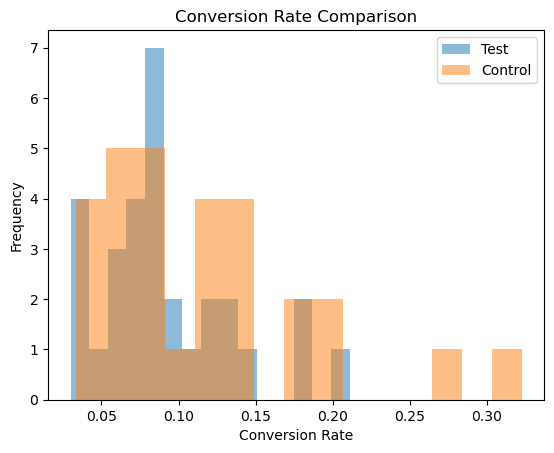

In [58]:
import matplotlib.pyplot as plt

plt.hist(test_cr, bins=15, alpha=0.5, label="Test")
plt.hist(control_cr, bins=15, alpha=0.5, label="Control")
plt.legend()
plt.title("Conversion Rate Comparison")
plt.xlabel("Conversion Rate")
plt.ylabel("Frequency")
plt.show()

In [ ]:
STEP 1: Calculate Mean Conversion Rates

In [61]:
mean_test = test_cr.mean()
mean_control = control_cr.mean()

mean_test, mean_control

(0.09231181703283602, 0.11477203226762732)

In [ ]:
STEP 2: Calculate Standard Error

In [62]:
standard_error = np.sqrt(
    (var_test / n_test) + (var_control / n_control)
)

standard_error

0.01507402840223552

In [ ]:
🔢 STEP 3: Calculate t-statistic (Core A/B Test)

In [63]:
t_stat = (mean_test - mean_control) / standard_error

t_stat

-1.4899942228754453

In [ ]:
STEP 4: Calculate p-value (Normal Approximation)

In [64]:
p_value = 2 * (1 - (
    0.5 * (1 + np.math.erf(abs(t_stat) / np.sqrt(2)))
))

p_value

0.1362257549589776

In [ ]:
STEP 5: Hypothesis Decision

In [65]:
alpha = 0.05

if p_value < alpha:
    decision = "Reject H0"
else:
    decision = "Fail to Reject H0"

decision

'Fail to Reject H0'

In [ ]:
STEP 6: 95% Confidence Interval

In [66]:
ci_low = (mean_test - mean_control) - 1.96 * standard_error
ci_high = (mean_test - mean_control) + 1.96 * standard_error

ci_low, ci_high

(-0.052005310903172924, 0.007084880433590318)

In [ ]:
STEP 7: Create Summary Table (Deliverable)

In [67]:
summary_df = pd.DataFrame({
    "Group": ["Test", "Control"],
    "Mean_Conversion_Rate": [mean_test, mean_control]
})

summary_df

,Group,Mean_Conversion_Rate
0,Test,0.092312
1,Control,0.114772


In [68]:
summary_df.to_csv("ab_test_summary.csv", index=False)

In [ ]:
STEP 8: Final Business Recommendation (Deliverable)

In [69]:
final_text = f"""
A/B Testing Final Report

Mean Conversion Rate (Test): {mean_test:.4f}
Mean Conversion Rate (Control): {mean_control:.4f}

t-statistic: {t_stat:.4f}
p-value: {p_value:.4f}
Alpha: 0.05

Decision: {decision}

95% Confidence Interval for Difference:
[{ci_low:.4f}, {ci_high:.4f}]

Business Recommendation:
There is no statistically significant difference between the Test and Control campaigns.
The Control campaign should be continued. Consider running the experiment longer or
testing a stronger variation.
"""

print(final_text)


A/B Testing Final Report

Mean Conversion Rate (Test): 0.0923
Mean Conversion Rate (Control): 0.1148

t-statistic: -1.4900
p-value: 0.1362
Alpha: 0.05

Decision: Fail to Reject H0

95% Confidence Interval for Difference:
[-0.0520, 0.0071]

Business Recommendation:
There is no statistically significant difference between the Test and Control campaigns.
The Control campaign should be continued. Consider running the experiment longer or
testing a stronger variation.



In [ ]:
STEP 9: Visualization (Already done, but final version)

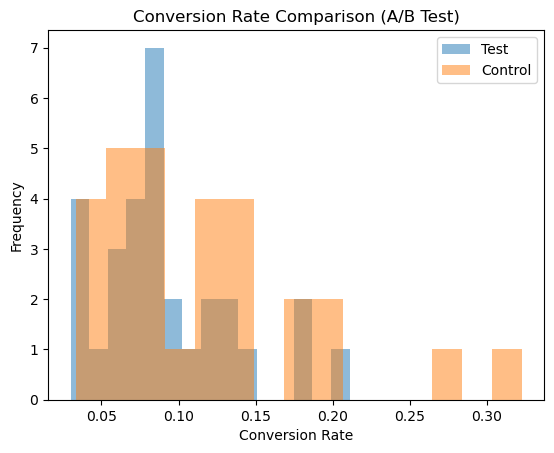

In [70]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(test_cr, bins=15, alpha=0.5, label="Test")
plt.hist(control_cr, bins=15, alpha=0.5, label="Control")
plt.legend()
plt.xlabel("Conversion Rate")
plt.ylabel("Frequency")
plt.title("Conversion Rate Comparison (A/B Test)")
plt.show()